# __Discovery of Linear Regression__

# Linear regression using the Normal Equation

In [16]:
from sklearn import datasets
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [17]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

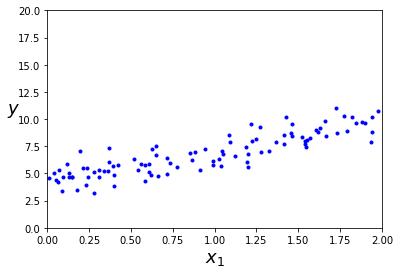

In [18]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 20])
plt.show()

***

___Add x0 = 1 to each instance and calculate Normal Equation___

In [19]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.20831857],
       [2.79226572]])

___Now we will create new X value that we will use to to predict___

In [20]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.20831857],
       [9.79285   ]])

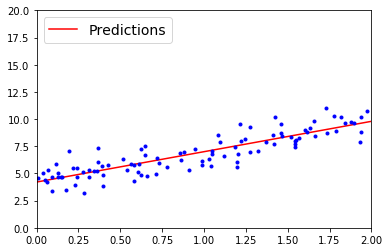

In [21]:
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 20])
plt.legend(loc="upper left", fontsize=14)
plt.show()

***

### Calculating coeficients using sklearn standar library for Linear Regression

In [22]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.20831857]), array([[2.79226572]]))

In [23]:
print("Prediction using sklearn: ", lin_reg.predict(X_new))
print("Prediction using normal e.: ", y_predict)

Prediction using sklearn:  [[4.20831857]
 [9.79285   ]]
Prediction using normal e.:  [[4.20831857]
 [9.79285   ]]


***


___<br>
This function computes $\mathbf{X}^+\mathbf{y}$, where $\mathbf{X}^{+}$ is the pseudoinverse of $\mathbf{X}$. 
<br>
We can use np.linalg.pinv() to compute the pseudoinverse directly:
<br>___

In [24]:
np.linalg.pinv(X_b).dot(y)

array([[4.20831857],
       [2.79226572]])

___As we can see all of these methods actually have the same results___

# Linear regression using batch gradient descent

> Code for calculateing gradient descent in bathch using this equotion:
> ### $\frac{2}{m}\sum_{i=1}^m(\theta^T\mathbf{x}^i - y^i)x_j^i$


In [25]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) #random init state of theta

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [26]:
theta

array([[4.20831857],
       [2.79226572]])

In [27]:
X_new_b.dot(theta)

array([[4.20831857],
       [9.79285   ]])

***

__<br>
Now we will plot and see how learning rate influencis equation.
<br>__

In [28]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

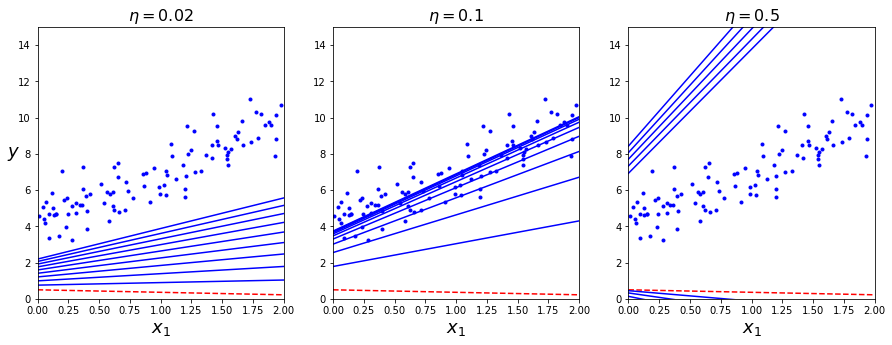

In [29]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(15,5))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

-  As we can see the figure on the left where learning rate is __too low__: the algorithm will eventually reach th solution but it will take really long time.<br>
-  In the middle, the learning rate is 0.1 and it looks like __optimal value__ for it. Since it reaches convergence in a few iterations.<br>
-  On the right , the learning rate is __too high__: the algorithm diverges and jumps over actuall solution that we want.<br>

<div class="alert alert-block alert-info">
<b>Tip: </b> Obviously the optimal value for learning rate would be different with different tasks. And learning rate will affect a algorithm the most out of all hyper-parametrs. So its worth the time to tune it. There is no much reliable ways to tune it so one of the ways would be just simple trial and error.
</div>

# Stochastic Gradient Descent

___The disadvantage of batch Gradient Descent is that it uses the whole training set to compute the gradients at every step. This method cen be sometimes slow for example when we need to use large data set. Thats where Stochastic Gradient Descent comes in. It picks a random instance in the training set at every step and computes the gradients based only on that single instance. Which makes the algorythm much faster. (also SGD can be implemented as out-of-core algorithm) Possible disadvantage of SGD is its random nature. Over time the SGD will bring us very close to minimum, but when it gets there it will continue to bounce around, never settling donw. Altho the iregularity of cost function can actullay help the algorithm not to get stuck in local minimum so it hase batter chance to find global minimum.___

>  One of the ways we can sort of solve the problem of SGD is gradually reduce the learning rate. The steps start out large, then get smaller and smaller, allowing the algorithm to settle at the global minimum.

In [30]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

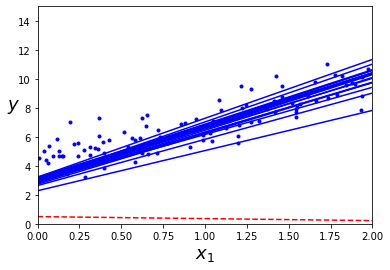

In [31]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)        
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 

plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                         
plt.show()

In [32]:
theta

array([[4.24042206],
       [2.81339809]])

<div class="alert alert-block alert-info">
<b>Tip:</b> There is a way in sklearn to use SGD using code like this:<br> 
    <b>sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty=None, eta0=0.1, random_state=42)<br>
    sgd_reg.fit(X, y.ravel())
    </b>
</div>

***

# Mini-batch gradient descent

___Mini-bath gradient descent is sort of like combination of SGD and BatchGD. At each step, instead of computing the gradients based on full training set (like BatchGD) or based on just one instance (like SGD), Mini-batch computes the gradients on small random sets of instances called <font color=yellow>Mini-batches</font>. The advantage of Mini-batch over SGD is that you can get a performance boost from hardware optimization of matrix operations. It is less erratic than SGD, but little less likely to escape local minima.___

In [33]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [34]:
theta

array([[4.23219116],
       [2.82565088]])

In [35]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

>  The figure below shows comparison of Batch, Stochastic and Mini-batch gradient descents

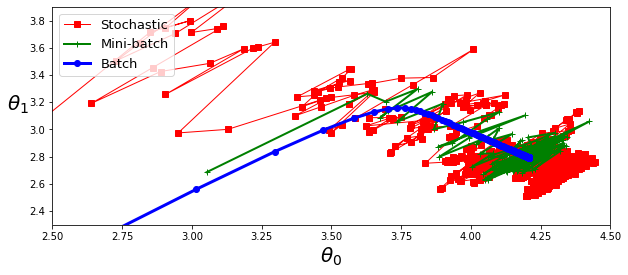

In [41]:
plt.figure(figsize=(10,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=13)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()